<a href="https://colab.research.google.com/github/LaurenKarwacki/Lauren-Karwacki/blob/main/coding_homework_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #8

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, <code>matplotlib.pyplot as plt</code>, and <code>from scipy.stats import pearsonr</code>.

3. For this assignment, you will be working with the <code>fear_conditioning_traces_hw8.csv</code>, and <code>extinction_predictors_hw8.csv</code> files that I uploaded to our shared Google Drive folder. You will also be using the <code>shock_index.csv</code> and <code>tone_index.csv</code> files on our shared GitHub repo (we used these files to complete our in-class coding notebook on 4/10/24). Upload all of these files to your GitHub repo, and import them as <code>numpy</code> arrays named <code>fear_traces</code>, <code>extinction_predictors</code>, <code>shock_index</code>, and <code>tone_index</code>, respectively, in a *Code Cell*. **Important**: Make sure you that import <code>tone_index.csv</code> and <code>shock_index.csv</code> using the **exact** syntax that we used in our 4/10/24 in-class notebook - e.g., <code>np.loadtxt('', delimiter = ',').astype(int)</code>.

4. The <code>fear_conditioning_traces</code> array contains scaled (between 0 and 1) fluorescent traces from ROIs (individual cells) in the anterior cingulate cortex (ACC) of one mouse during **fear conditioning** and **fear extinction**. We went over fear conditioning in class - the mouse is presented with an auditory tone that coincides with a mild foot-shock. The mouse learns to associate the tone with the foot-shock, thereby forming a fear memory. This mouse underwent fear conditioning, and 48 hours later, was placed back into the conditioning chamber and presented with the auditory tone to assess how well it remembered the tone/foot-shock combination. The tone was presented a total of 22 times - eventually, as the tone is continuously presented without the foot-shock, the mouse begins to disassociate the tone and the foot-shock, and form a neutral extinction memory. The cells in your <code>fear_conditioning_traces</code> array were able to be stably imaged across both sessions, allowing us to compare how they react across fear memory formation and extinction.

5. In a new *Code Cell*, make two new variables - <code>conditioning_traces</code>, and <code>extinction_traces</code>. Your <code>fear_conditioning_traces</code> array contains ROIs (cells) in columns, and samples in rows. The first 10458 samples correspond to the conditioning session, and the remaining samples correspond to the extinction session. Your <code>conditioning_traces</code> array should contain the first 10458 samples (as rows), with ROIs (cells) as columns. Your <code>extinction_traces</code> array should contain the remaining (10459 through the final sample) samples (as rows), with ROIs (cells) as columns.

6. In a new *Code Cell*, print the size of your <code>conditioning_traces</code> and <code>extinction_traces</code> arrays.

7. In a new *Code Cell*, make <code>time_conditioning</code> and <code>time_extinction</code> variables, corresponding to time during the conditioning session, and time during the extinction session, respectively. The sampling rate for the miniscope used to capture these data was 15 fps. Use this information to make your variables, which should both start at "0", end at the total length of the recording session (in seconds), and have a length equal to the number of samples for each session.

8. In a new *Markdown Cell*, state the number of ROIs (cells) that were imaged during these sessions, and the total length of time, both in seconds, and in minutes, of the conditioning and extinction sessions.

9. In a new *Code Cell*, plot the first and second ROIs from your <code>conditioning_traces</code> variable in one subplot. Plot the first and second ROIs from your <code>extinction_traces</code> variable in a second subplot. Make the first ROI <font color = 'blue'>blue</font>, and the second ROI <font color = 'red'>red</font> in each subplot. Put time on the x-axis of both subplots. Make vertical black lines at shock onset (3 total), and vertical green lines at tone onset (3 total) in your first subplot. Label your axes.

10. In a new *Markdown Cell*, describe the relationship between the conditioning/extinction traces for your first ROI, and the conditioning/extinction traces for your second ROI. Does there seem to be a relationship between how a cell responds during conditioning, and how it responds during extinction?

11. To evaluate how each cell might respond during conditioning and extinction more formally, we're going to use generalized linear modeling (GLM). To do this, we're going to use shock onset and tone onset as predictors in our model for the conditioning session, and tone onset as predictors for another model for the extinction session. We'll correlate the actual traces and the predicted traces from these models, and compare correlation coefficients between the two sessions to see if there's a relationship. This will answer the question: If a cell responds more strongly to shocks/tones during conditioning, does it also respond more strongly to tones during extinction? In other words - are the cells that encode the tone/shock memory the same cells that form the extinction memory?

12. In a new *Code Cell*, make a <code>predictors_conditioning</code> variable that contains shock onset and tone onset. Reference our in-class notebook from 4/10/24 to do this - specifically, the *Code Cell* underneath the section that says **Modeling our Fear Data**. These are the same data that we used for this notebook, so you can use this exact code to re-create your <code>shock_array</code> and <code>tone_array</code> variables. Reference how we made the <code>predictors</code> variable for <code>model1</code> and <code>model3</code> in that notebook - you should have the same <code>predictors</code> variable as <code>model3</code> for your <code>predictors_conditioning</code> variable here (i.e., the two variables should be identical).

13. We want to now run our model for each ROI in our <code>conditioning_traces</code> array, correlate the predicted trace vs. the actual trace, and store the correlation coefficient in a new variable called <code>r_model_conditioning</code>. To do this, reference the last *Code Cell* in our notebook from 4/10/24 - specifically, the subsection that says <code># For model 3</code>. You will need to first create your <code>r_model_conditioning</code> variable using <code>np.zeros</code> - remember that this time, we have more than 10 ROIs, so you will need to change the number inside of the parentheses. You will also need to change the number of times your loop runs from <code>for i in range(10)</code> to loop through all of the ROIs in your <code>conditioning_traces</code> array. In a new *Code Cell*, create your <code>r_model_conditioning</code> variable, and run your <code>for</code> loop. Each loop should extract an ROI from <code>conditioning_traces</code>, run <code>sm.GLM</code> between the trace and the <code>predictors</code> variable you created, fit the model, create a predicted trace, get a correlation coefficient using <code>pearsonr</code>, and store the correlation coefficient in a new column of <code>r_index_conditioning</code>.

14. In a new *Code Cell*, run another loop that does the same thing for your <code>extinction_traces</code> array. This time, you should make a variable called <code>r_index_extinction</code> to store your correlation coefficients. You should use your <code>extinction_predictors</code> variable as the predictor for your model (this contains values for tone onset during the extinction session).

15. In a new *Code Cell*, use the <code>pearsonr</code> function to correlate your <code>r_index_conditioning</code> and <code>r_index_extinction</code> variables.

16. In a new *Code Cell*, make a <code>scatter</code> plot with <code>r_index_conditioning</code> on the x-axis, and <code>r_index_extinction</code> on the y-axis. Label your axes.

17. In a new *Markdown Cell*, interpret your results. Based on your correlation coefficient and scatter plot, does it seem like a cell that responds strongly to shock and tone onset during the conditioning session is more likely to respond strongly to tone onset during the extinction session?

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_8.ipynb</code>.

## Lauren Karwacki

*NEUR25*

**4/19/2024**

In [172]:
#2 This code cell imports the modules to be used throughout the notebook.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [173]:
#3 This code cell imports all of the datasets and indeces to be used throughout the notebook and converts them to numpy arrays.
fear_traces = np.loadtxt('https://raw.githubusercontent.com/LaurenKarwacki/Lauren-Karwacki/main/fear_conditioning_traces_hw8.csv', delimiter = ',')
extinction_predictors = np.loadtxt('https://raw.githubusercontent.com/LaurenKarwacki/Lauren-Karwacki/main/extinction_predictors_hw8.csv', delimiter = ',')
shock_index = np.loadtxt('https://raw.githubusercontent.com/hallockh/neur_265/main/data/shock_index.csv', delimiter = ',').astype(int)
tone_index = np.loadtxt('https://raw.githubusercontent.com/hallockh/neur_265/main/data/tone_index.csv', delimiter = ',').astype(int)

In [174]:
# 5 This code cell indexes the data from the conditioning session in the "conditioning_traces" variable and the extinction session in the "extinction_traces" variable.
conditioning_traces = fear_traces[:10458,:]
extinction_traces = fear_traces[10458:,:]

In [175]:
#6 This code cell prints the size of conditioning_traces and extinction_traces respectively.
print(conditioning_traces.shape)
print(extinction_traces.shape)

(10458, 63)
(14210, 63)


In [176]:
#7 This code cell creates time variables with values between 0 and the rate of each group, with equally spaced values between the time values.
# The "time_conditioning" variable will have 10458 values and the "time_extinction" variable will have 14210 values.
conditioning_rate = 10458/15
time_conditioning = np.linspace(0,conditioning_rate,10458)
extinction_rate = 14210/15
time_extinction = np.linspace(0,extinction_rate,14210)

print(extinction_rate)
print(conditioning_rate)

947.3333333333334
697.2


* **Number of ROIs Imaged (Conditioning):** 10458
* **Total Length of Time (Conditioning):** 697.200 seconds (11.620 minutes)

* **Number of ROIs Imaged (Extinction):** 14210
* **Total Length of Time (Extinction):** 947.333 seconds (15.789 minutes)

<ipython-input-214-a60d099b6a69>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax[0].plot([50, 50], [0,1.0], 'k', lw=2, color = 'green')
<ipython-input-214-a60d099b6a69>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax[0].plot([150, 150], [0,1.0], 'k', lw=2, color = 'green')
<ipython-input-214-a60d099b6a69>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax[0].plot([250, 250], [0,1.0], 'k', lw=2, color = 'green')


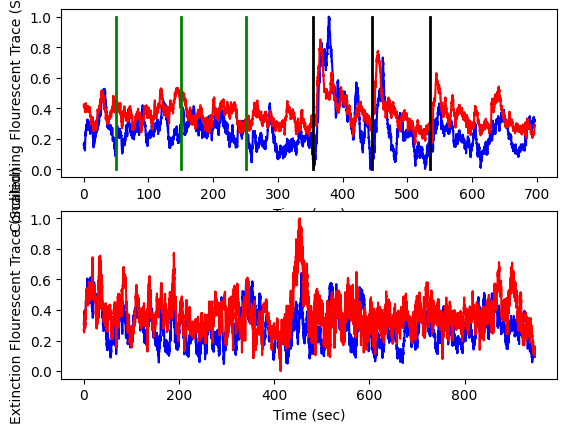

In [214]:
#9 This code attributes "ax" to two separate subplots.
fig, ax = plt.subplots(2)

# This code plots the first two ROIs from the "conditioning_traces" variable in the first subplot, labeling the axes accordingly.
ax[0].plot(time_conditioning, conditioning_traces[:,0], color = 'blue')
ax[0].plot(time_conditioning, conditioning_traces[:,1], color = 'red')
ax[0].set_xlabel('Time (sec)')
ax[0].set_ylabel('Conditioning Flourescent Trace (Scaled)')

# This code plots the first two ROIs from the "extinction_traces" variable in the second subplot labeling the axes accordingly.
ax[1].plot(time_extinction, extinction_traces[:,0], color = 'blue')
ax[1].plot(time_extinction, extinction_traces[:,1], color = 'red')
ax[1].set_xlabel('Time (sec)')
ax[1].set_ylabel('Extinction Flourescent Trace (Scaled)')

# This code plots vertical lines at times when there were shocks (in black).
ax[0].plot([355, 355], [0,1.0], 'k', lw=2)
ax[0].plot([445, 445], [0,1.0], 'k', lw=2)
ax[0].plot([535, 535], [0,1.0], 'k', lw=2)

# This code plots vertical lines at times when there were tones (in green).
ax[0].plot([50, 50], [0,1.0], 'k', lw=2, color = 'green')
ax[0].plot([150, 150], [0,1.0], 'k', lw=2, color = 'green')
ax[0].plot([250, 250], [0,1.0], 'k', lw=2, color = 'green')

* In the first ROI for the conditioning traces, the flourescent traces appear to be generally more consistent with amplitudes between each datapoint.
* In the first ROI for the extinction traces, the flourescent traces appear to be less consistent, with greater amplitudes between each datapoint.
* In the second ROIs for both the conditioning and extinction traces, the same pattern appears for the amplitudes between each datapoint.
* During conditioning, there is greater consistency of flourescence while for extinction, there is more variability between datapoints.  
* In general for both groups, the first ROI appeared have a lesser amount of flourescent traces compared to the second ROI.

In [178]:
#12 This code creates the "shock_array" variable using a for loop
shock_array = np.zeros(10458)
for i in range(10458):
  if i >= (shock_index[0]-15)*15 and i <= (shock_index[0]+30)*15:
    shock_array[i] = 1
  elif i>= (shock_index[1]-15)*15 and i <= (shock_index[1]+30)*15:
    shock_array[i] = 1
  elif i>= (shock_index[2]-15)*15 and i <= (shock_index[2]+30)*15:
    shock_array[i] = 1
  else:
    shock_array[i] = 0

# This code creates the "tone_array" variable using a for loop.
tone_array = np.zeros(10458)
for i in range(10458):
  if i >= (tone_index[0]-15)*15 and i <= (tone_index[0]+30)*15:
    tone_array[i] = 1
  elif i>= (tone_index[1]-15)*15 and i <= (tone_index[1]+30)*15:
    tone_array[i] = 1
  elif i>= (tone_index[2]-15)*15 and i <= (tone_index[2]+30)*15:
    tone_array[i] = 1
  else:
    tone_array[i] = 0

# This code imports different packages to be used further in the code cell.
from pandas import DataFrame as df
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from statsmodels.genmod.families.links import identity, log
from scipy.stats import chi2
from statsmodels.distributions.empirical_distribution import ECDF

# This code labels the first ROI of the "conditioning_traces" variable as "first_trace"
first_trace = conditioning_traces[:,0]

# This code creates the "predictors_conditioning" variable using both the shock onset and tone onset information for the best model.
predictors = df(data={'Intercept': np.ones_like(tone_array), 'tone onset': tone_array})
predictors['shock onset'] = shock_array
model_conditioning = sm.GLM(first_trace, predictors, family=Poisson())
model_conditioning_results = model_conditioning.fit() # Fit model to our data
b1 = model_conditioning_results.params
print('b1:')
print(b1)

b1:
Intercept     -1.346329
tone onset    -0.431768
shock onset    0.411876
dtype: float64


Text(0, 0.5, 'Cumulative Proportion of ROIs')

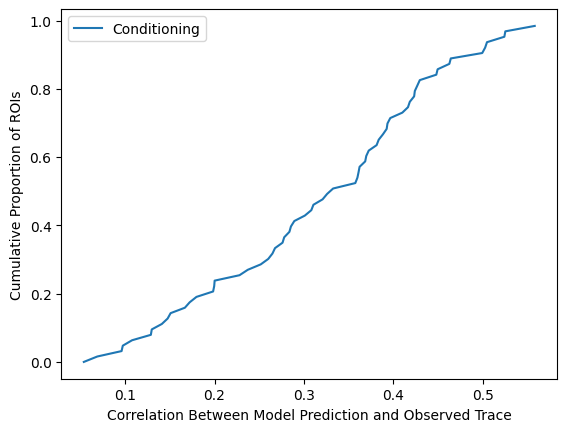

In [202]:
#13 This code creates a cumulative distribution of r values for the conditioning_traces dataset using a for loop.
predictors['shock onset'] = shock_array
r_model_conditioning = np.zeros(63)

r_index_conditioning = []
for i in range(63):
  trace_temp = conditioning_traces[:,i]
  model_conditioning = sm.GLM(trace_temp, predictors, family=Poisson())
  model_conditioning_results = model_conditioning.fit()
  predicted_trace = model_conditioning_results.predict()
  r3 = pearsonr(trace_temp, predicted_trace)
  r_model_conditioning[i] = r3.statistic
  r_index_conditioning.append(r_model_conditioning[i])

# This code creates a plot of the cumulative proportion of ROIs compared to the correlation between the model prediction and the actual observed trace.
plt.plot(np.sort(r_model_conditioning), np.linspace(0, 1, len(r_model_conditioning), endpoint=False), label = "Conditioning")
plt.legend()
plt.xlabel('Correlation Between Model Prediction and Observed Trace')
plt.ylabel('Cumulative Proportion of ROIs')

b1:
[-1.33168783]


Text(0, 0.5, 'Cumulative Proportion of ROIs')

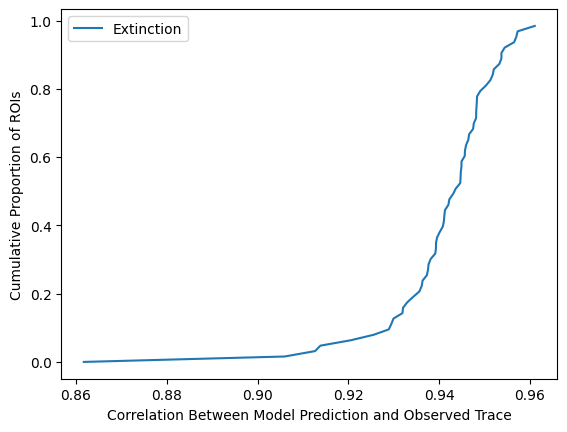

In [203]:
#12 This code labels the first ROI of the "extinction_traces" variable as "first_trace_e"
first_trace = extinction_traces[:,0]
extinction_predictors_truncated = extinction_predictors[:-1]

# This code creates the "extinction_traces" variable using both the shock onset and tone onset information for the best model.
predictors['shock onset'] = shock_array
model_extinction = sm.GLM(first_trace, extinction_predictors_truncated, family=Poisson())
model_extinction_results = model_extinction.fit() # Fit model to our data
b1 = model_extinction_results.params
print('b1:')
print(b1)

#13 This code creates a cumulative distribution of r values for the extinction_traces dataset using a for loop.
r_model_extinction = np.zeros(63)

r_index_extinction = []
for i in range(63):
  trace_temp = extinction_traces[:,i]
  model_extinction = sm.GLM(trace_temp, extinction_traces, family=Poisson())
  model_extinction_results = model_extinction.fit()
  predicted_trace = model_extinction_results.predict()
  r3 = pearsonr(trace_temp, predicted_trace)
  r_model_extinction[i] = r3.statistic
  r_index_extinction.append(r_model_extinction[i])

# This code creates a plot of the cumulative proportion of ROIs compared to the correlation between the model prediction and the actual observed trace.
plt.plot(np.sort(r_model_extinction), np.linspace(0, 1, len(r_model_extinction), endpoint=False), label = "Extinction")
plt.legend()
plt.xlabel('Correlation Between Model Prediction and Observed Trace')
plt.ylabel('Cumulative Proportion of ROIs')

In [204]:
#15 This code cell uses the pearsonr function to correlate the consitioning and extinction r_index variables.
pearsonr(r_index_conditioning, r_index_extinction)

PearsonRResult(statistic=0.20931585665582805, pvalue=0.09967775344396018)

Text(0, 0.5, 'Extinction Index')

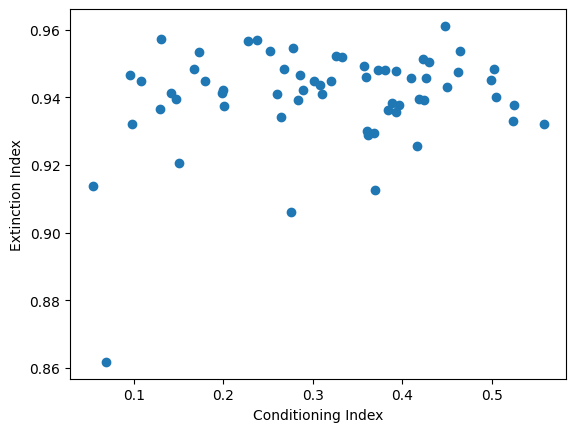

In [206]:
#16 This code makes a scatterplot with the "r_index_conditioning" variable on the x-axis and the "r_index_extinction" variable on the y-axis.
plt.scatter(r_index_conditioning, r_index_extinction)
plt.xlabel('Conditioning Index')
plt.ylabel('Extinction Index')

* Based on my results, it would appear that whether a cell responds strongly or not to a shock or a tone during conditioning will not have much of an effect on whether it is more likely to respond strongly or not to a shock or a tone during extinction.
* In the scatterplot, the extinction index appears to be about the same as the conditioning index increases, so there doesn't appear to be a great effect when comparing conditioning to extinction.  